# *First we will import the required libaries for the data analysis*

In [2]:
#Libraries for analysis of the given data
import numpy as np
import pandas as pd
pd.set_option('display.max_rows',100)
from scipy import stats as st

In [3]:
#libraries for visualization of the data 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")

In [4]:
#importing warnings library to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# *Reading and understanding the data*

### Data Processing :Loading data and seeing its info and statistical view 

In [5]:
#columns_description.csv file has meanings of variables 
col_description=pd.read_csv("columns_description.csv",encoding = 'unicode_escape')

#previous_application.csv file has the information about the client’s previous loan data 
prev_data=pd.read_csv("previous_application.csv",encoding = 'unicode_escape')

#application_data.csv file contains all the information of the client at the time of application 
application_data=pd.read_csv("application_data.csv",encoding = 'unicode_escape')


In [6]:
#getting info of the col_description DataFrame
print(col_description.info())
print("-"*50)
print(f"The shape is {col_description.shape} and number of rows are {col_description.shape[0]} \
and number of columns are {col_description.shape[-1]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 5 columns):
Unnamed: 0     160 non-null int64
Table          160 non-null object
Row            160 non-null object
Description    160 non-null object
Special        69 non-null object
dtypes: int64(1), object(4)
memory usage: 6.4+ KB
None
--------------------------------------------------
The shape is (160, 5) and number of rows are 160 and number of columns are 5


In [7]:
#using.head() for getting preview of the dataframe
col_description.head()


,Unnamed: 0,Table,Row,Description,Special
0,1,application_data,SK_ID_CURR,ID of loan in our sample,NaN
1,2,application_data,TARGET,Target variable (1 - client with payment diffi...,NaN
2,5,application_data,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving,NaN
3,6,application_data,CODE_GENDER,Gender of the client,NaN
4,7,application_data,FLAG_OWN_CAR,Flag if the client owns a car,NaN


In [8]:
#getting info of the application_data DataFrame
#storing application_data_before_cleaning into an array for further purposes
application_data_before_cleaning=application_data.shape
print(application_data.info())
print("-"*50)
print(f"The shape is {application_data.shape} and number of rows are {application_data.shape[0]} \
and number of columns are {application_data.shape[-1]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None
--------------------------------------------------
The shape is (307511, 122) and number of rows are 307511 and number of columns are 122


In [9]:
#seeing columns in application_data
print(application_data.columns.to_list())

['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELE

In [10]:
#using .head() for getting preview of the dataframe
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#getting info of the prev_data DataFrame
# storing prev_data shape into prev_data_before_cleaning for comparision in later parts
print(prev_data.info())
print("-"*50)
print(f"The shape is {prev_data.shape} and number of rows are {prev_data.shape[0]} \
and number of columns are {prev_data.shape[-1]}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [12]:
#using .head() for getting preview of the dataframe
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
#statistical view of col_description 
col_description.describe()

,Unnamed: 0
count,160.00000
mean,94.58750
std,64.12727
min,1.00000
25%,42.75000
50%,82.50000
75%,122.25000
max,213.00000


In [14]:
#statistical view of application_data
application_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [15]:
##statistical view of prev_data
prev_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


### As we can see columns description has lots of variables so lets write a custom function to ease up the work 

In [16]:
#building a new column for custom function
col_description["combined"]=col_description["Table"]+"@"+col_description["Row"]
# using table names  for custom function which are 'application_data','previous_application.csv'

In [17]:
#custom function to ease up the work which fetches the description of a particular row from particular data set
def description_retriever(Row,Table_name):
    var=Table_name+"@"+Row
    out=col_description[col_description.combined==var].Description.iloc[0]
    print( f" Table : {Table_name} \n row: {Row} \n description : {out}")

In [18]:
description_retriever("SK_ID_CURR","application_data")

 Table : application_data 
 row: SK_ID_CURR 
 description : ID of loan in our sample


## Lets do analysis of null values present in the application_data dataset to determine the data cleaning approach

In [19]:
#getting null values for columns if it has atleast as single null value into application_data_null
application_data_null=application_data.isnull().sum()[application_data.isnull().sum()>0]

In [20]:
#changing application_data_null  into percentage for ease
application_data_null=round((100*application_data_null)/len(application_data),5)
#filtering application_data_null if it has atleast 50% null values
application_data_null=application_data_null[application_data_null>50]
application_data_null

OWN_CAR_AGE                 65.99081
EXT_SOURCE_1                56.38107
APARTMENTS_AVG              50.74973
BASEMENTAREA_AVG            58.51596
YEARS_BUILD_AVG             66.49778
COMMONAREA_AVG              69.87230
ELEVATORS_AVG               53.29598
ENTRANCES_AVG               50.34877
FLOORSMIN_AVG               67.84863
LANDAREA_AVG                59.37674
LIVINGAPARTMENTS_AVG        68.35495
LIVINGAREA_AVG              50.19333
NONLIVINGAPARTMENTS_AVG     69.43296
NONLIVINGAREA_AVG           55.17916
APARTMENTS_MODE             50.74973
BASEMENTAREA_MODE           58.51596
YEARS_BUILD_MODE            66.49778
COMMONAREA_MODE             69.87230
ELEVATORS_MODE              53.29598
ENTRANCES_MODE              50.34877
FLOORSMIN_MODE              67.84863
LANDAREA_MODE               59.37674
LIVINGAPARTMENTS_MODE       68.35495
LIVINGAREA_MODE             50.19333
NONLIVINGAPARTMENTS_MODE    69.43296
NONLIVINGAREA_MODE          55.17916
APARTMENTS_MEDI             50.74973
B

### *As we can see there are columns with 50% null values in the application_data and that is not really useful for analysis so we will be dropping them*

In [21]:
#Dropping the columns from application_data
application_data.drop(columns=application_data_null.index,inplace=True)

In [22]:
#checking the shape of application_data for seeing rows and columns 
application_data.shape

(307511, 81)

In [23]:
#so lets see how much data is retained column wise in percentage
round(100*(application_data_before_cleaning[-1]-len(application_data_null.index))/application_data_before_cleaning[-1],2)

66.39

In [24]:
#once we are done with cleaning we don't need few variables since our work is done so lets remove them
del application_data_before_cleaning
del application_data_null

#### As we can see we retained 66.39% column data after dropping columns with high null,now  lets see null values in application_data

In [25]:
#column wise null in percentage from application data  and their data types
(round(100*(application_data.isnull().sum()[application_data.isnull().sum()>0])/len(application_data),5)).sort_values(ascending=True)


DAYS_LAST_PHONE_CHANGE           0.00033
CNT_FAM_MEMBERS                  0.00065
AMT_ANNUITY                      0.00390
AMT_GOODS_PRICE                  0.09040
EXT_SOURCE_2                     0.21463
DEF_60_CNT_SOCIAL_CIRCLE         0.33202
OBS_60_CNT_SOCIAL_CIRCLE         0.33202
DEF_30_CNT_SOCIAL_CIRCLE         0.33202
OBS_30_CNT_SOCIAL_CIRCLE         0.33202
NAME_TYPE_SUITE                  0.42015
AMT_REQ_CREDIT_BUREAU_MON       13.50163
AMT_REQ_CREDIT_BUREAU_WEEK      13.50163
AMT_REQ_CREDIT_BUREAU_DAY       13.50163
AMT_REQ_CREDIT_BUREAU_HOUR      13.50163
AMT_REQ_CREDIT_BUREAU_YEAR      13.50163
AMT_REQ_CREDIT_BUREAU_QRT       13.50163
EXT_SOURCE_3                    19.82531
OCCUPATION_TYPE                 31.34555
EMERGENCYSTATE_MODE             47.39830
TOTALAREA_MODE                  48.26852
YEARS_BEGINEXPLUATATION_MEDI    48.78102
YEARS_BEGINEXPLUATATION_MODE    48.78102
YEARS_BEGINEXPLUATATION_AVG     48.78102
FLOORSMAX_MODE                  49.76082
FLOORSMAX_AVG   

### Lets figure out the way to impute  few columns with less than 13%null values and reporting them

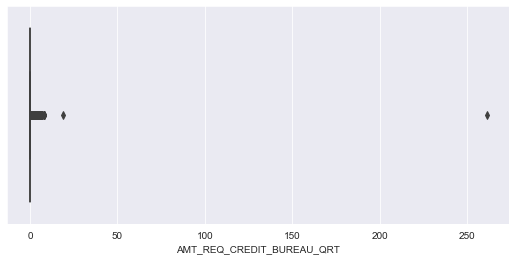

The median of the columnn AMT_REQ_CREDIT_BUREAU_QRT is 0.0


In [26]:
#checking the column "AMT_REQ_CREDIT_BUREAU_QRT" outliers by using boxplot to decide  approach of imputing  missing values 
plt.figure(figsize=(9,4))
sns.boxplot(application_data["AMT_REQ_CREDIT_BUREAU_QRT"].dropna())
plt.show()
print(f"The median of the columnn AMT_REQ_CREDIT_BUREAU_QRT is {application_data.AMT_REQ_CREDIT_BUREAU_QRT.median()}")

#### The best metric to impute the columnn 'AMT_REQ_CREDIT_BUREAU_QRT ' is  by using median and we can conclude it from above boxplot

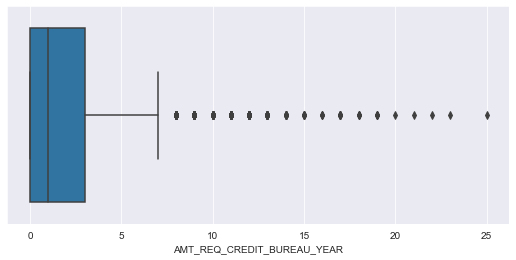

The median of the columnn AMT_REQ_CREDIT_BUREAU_YEAR is 1.0


In [27]:
#checking the column "AMT_REQ_CREDIT_BUREAU_YEAR" outliers by using boxplot to decide  approach of imputing  missing values 
plt.figure(figsize=(9,4))
sns.boxplot(application_data["AMT_REQ_CREDIT_BUREAU_YEAR"].dropna())
plt.show()
print(f"The median of the columnn AMT_REQ_CREDIT_BUREAU_YEAR is {application_data.AMT_REQ_CREDIT_BUREAU_YEAR.median()}")

#### The best metric to impute the columnn 'AMT_REQ_CREDIT_BUREAU_YEAR ' is  by using median and we can conclude it from above boxplot

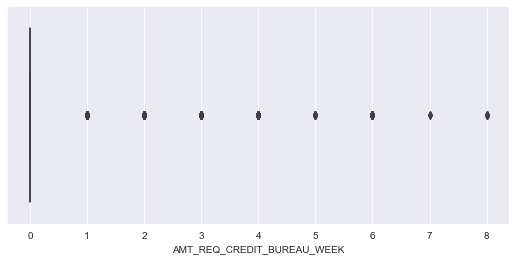

The median of the columnn AMT_REQ_CREDIT_BUREAU_WEEK is 0.0


In [28]:
#checking the column "AMT_REQ_CREDIT_BUREAU_WEEK" outliers by using distplot to decide  approach of imputing  missing values 
plt.figure(figsize=(9,4))
sns.boxplot(application_data["AMT_REQ_CREDIT_BUREAU_WEEK"].dropna())
plt.show()
print(f"The median of the columnn AMT_REQ_CREDIT_BUREAU_WEEK is {application_data.AMT_REQ_CREDIT_BUREAU_WEEK.median()}")

#### The best metric to impute the columnn 'AMT_REQ_CREDIT_BUREAU_WEEK ' is  by using median and we can conclude it from above boxplot

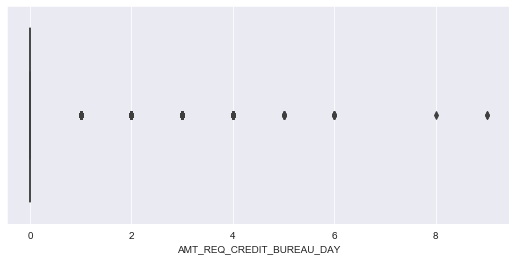

The median of the columnn AMT_REQ_CREDIT_BUREAU_DAY is 0.0


In [29]:
#checking the column "AMT_REQ_CREDIT_BUREAU_DAY" outliers by using distplot to decide  approach of imputing  missing values 
plt.figure(figsize=(9,4))
sns.boxplot(application_data["AMT_REQ_CREDIT_BUREAU_DAY"].dropna())
plt.show()
print(f"The median of the columnn AMT_REQ_CREDIT_BUREAU_DAY is {application_data.AMT_REQ_CREDIT_BUREAU_DAY.median()}")

#### The best metric to impute the columnn 'AMT_REQ_CREDIT_BUREAU_DAY ' is  by using median and we can conclude it from above boxplot

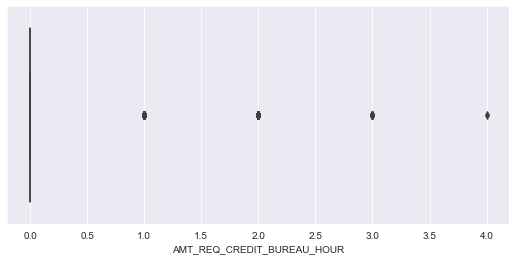

The median of the columnn AMT_REQ_CREDIT_BUREAU_HOUR is 0.0


In [30]:
#checking the column "AMT_REQ_CREDIT_BUREAU_HOUR" outliers by using distplot to decide  approach of imputing  missing values 
plt.figure(figsize=(9,4))
sns.boxplot(application_data["AMT_REQ_CREDIT_BUREAU_HOUR"].dropna())
plt.show()
print(f"The median of the columnn AMT_REQ_CREDIT_BUREAU_HOUR is {application_data.AMT_REQ_CREDIT_BUREAU_HOUR.median()}")


#### The best metric to impute the columnn 'AMT_REQ_CREDIT_BUREAU_HOUR ' is  by using median and we can conclude it from above boxplot

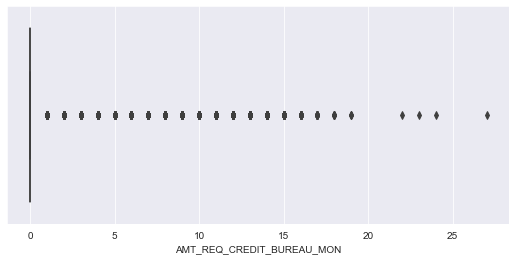

The median of the columnn AMT_REQ_CREDIT_BUREAU_MON is 0.0


In [31]:
#checking the column "AMT_REQ_CREDIT_BUREAU_MON" outliers by using boxplot to decide  approach of imputing  missing values 
plt.figure(figsize=(9,4))
sns.boxplot(application_data["AMT_REQ_CREDIT_BUREAU_MON"].dropna())
plt.show()
print(f"The median of the columnn AMT_REQ_CREDIT_BUREAU_MON is {application_data.AMT_REQ_CREDIT_BUREAU_MON.median()}")

#### The best metric to impute the columnn 'AMT_REQ_CREDIT_BUREAU_MON ' is  by using median and we can conclude it from above boxplot

## Subsetting the data which makes more sense for our study for further analysis

In [32]:
#selecting the columns which i need and storing them in a list
my_columns=['SK_ID_CURR','TARGET','NAME_CONTRACT_TYPE','CODE_GENDER',
            'FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN','AMT_INCOME_TOTAL',
            'AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','NAME_TYPE_SUITE',
            'NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS',
           'ORGANIZATION_TYPE','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
            'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR','EXT_SOURCE_2','OCCUPATION_TYPE','CNT_FAM_MEMBERS','DAYS_REGISTRATION','DAYS_BIRTH']

In [33]:
#selecting the required data and storing it into a variable application_data_cleaned for operational ease
application_data_cleaned=application_data[my_columns]

## Checking the datatypes of the application_data_cleaned and changing datatype of the column if required

In [34]:
application_data_cleaned.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
ORGANIZATION_TYPE              object
AMT_REQ_CREDIT_BUREAU_HOUR    float64
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
EXT_SOURCE_2                  float64
OCCUPATION_TYPE                object
CNT_FAM_MEMBERS               float64
DAYS_REGISTRATION             float64
DAYS_BIRTH  

In [35]:
#changing column "CNT_FAM_MEMBERS" datatype from float to integer
application_data_cleaned["CNT_FAM_MEMBERS"]=application_data_cleaned["CNT_FAM_MEMBERS"].astype('Int64')

In [36]:
#changing column "AMT_REQ_CREDIT_BUREAU_YEAR" datatype from float to integer
application_data_cleaned["AMT_REQ_CREDIT_BUREAU_YEAR"]=application_data_cleaned["AMT_REQ_CREDIT_BUREAU_YEAR"].astype('Int64')

In [37]:
#changing column "AMT_REQ_CREDIT_BUREAU_QRT" from float to integer
application_data_cleaned["AMT_REQ_CREDIT_QRT"]=application_data_cleaned["AMT_REQ_CREDIT_BUREAU_QRT"].astype('Int64')

In [38]:
#changing column "AMT_REQ_CREDIT_BUREAU_MON" from float to integer
application_data_cleaned["AMT_REQ_CREDIT_MON"]=application_data_cleaned["AMT_REQ_CREDIT_BUREAU_MON"].astype('Int64')

In [39]:
#changing column "AMT_REQ_CREDIT_BUREAU_WEEK" from float to integer
application_data_cleaned["AMT_REQ_CREDIT_WEEK"]=application_data_cleaned["AMT_REQ_CREDIT_BUREAU_WEEK"].astype('Int64')

In [40]:
#changing column "AMT_REQ_CREDIT_BUREAU_DAY" from float to integer
application_data_cleaned["AMT_REQ_CREDIT_DAY"]=application_data_cleaned["AMT_REQ_CREDIT_BUREAU_DAY"].astype('Int64')

In [41]:
#changing column "AMT_REQ_CREDIT_BUREAU_HOUR" from float to integer
application_data_cleaned["AMT_REQ_CREDIT_HOUR"]=application_data_cleaned["AMT_REQ_CREDIT_BUREAU_HOUR"].astype('Int64')

In [42]:
application_data_cleaned['DAYS_REGISTRATION']=application_data_cleaned['DAYS_REGISTRATION'].apply(lambda x:abs(x))

In [43]:
#Adding age column for analysis
application_data_cleaned['Age']=application_data_cleaned['DAYS_BIRTH'].apply(lambda x : abs(x)//365)
application_data_cleaned.drop(columns=['DAYS_BIRTH'],inplace = True)

## Checking for outliers in the application_data_cleaned

In [44]:
#using .describe on application_data_cleaned for a statistical view
application_data_cleaned.describe(percentiles=[0.99])

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,...,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE_2,CNT_FAM_MEMBERS,DAYS_REGISTRATION,AMT_REQ_CREDIT_QRT,AMT_REQ_CREDIT_MON,AMT_REQ_CREDIT_WEEK,AMT_REQ_CREDIT_DAY,AMT_REQ_CREDIT_HOUR,Age
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,265992.000000,265992.000000,265992.000000,...,265992.000000,3.068510e+05,307509.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,307511.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.006402,0.007000,0.034362,...,1.899974,5.143927e-01,2.152665,4986.120328,0.265474,0.267395,0.034362,0.007000,0.006402,43.435968
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.083849,0.110757,0.204685,...,1.869295,1.910602e-01,0.910682,3522.886321,0.794056,0.916002,0.204685,0.110757,0.083849,11.954593
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000000,0.000000,0.000000,...,0.000000,8.173617e-08,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.000000,0.000000,0.000000,...,1.000000,5.659614e-01,2.000000,4504.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000
99%,452712.900000,1.000000,3.000000,4.725000e+05,1.854000e+06,70006.500000,1.800000e+06,0.000000,0.000000,1.000000,...,8.000000,7.827928e-01,5.000000,13879.000000,2.000000,4.000000,1.000000,0.000000,0.000000,66.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,4.000000,9.000000,8.000000,...,25.000000,8.549997e-01,20.000000,24672.000000,261.000000,27.000000,8.000000,9.000000,4.000000,69.000000


In [45]:
#building a custom IQR function to drop the  outliers using Inter Quartile Range
def IQR(column):
    # q1,q3 lower and upper quartile
    q1 = application_data_cleaned[column].quantile(0.25)
    q3 = application_data_cleaned[column].quantile(0.75)
    iqr = q3-q1
    lower_lim = q1 - 1.5*(q3 - q1)
    upper_lim = q3 + 1.5*(q3 - q1)
    temp=application_data_cleaned[column]
    application_data_cleaned[column]=application_data_cleaned[column][(temp>lower_lim) & (temp<upper_lim)]


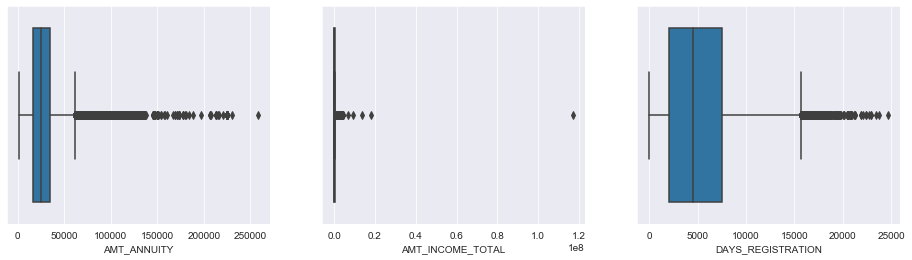

In [46]:
plt.figure(figsize=(16,4))
# finding outliers in column CNT_CHILDREN by using a box plot
plt.subplot(131)
sns.boxplot(application_data_cleaned['AMT_ANNUITY'])
#finding outliers in column AMT_INCOME_TOTAL by using a box plot
plt.subplot(132)
sns.boxplot(application_data_cleaned['AMT_INCOME_TOTAL'])
#finding outliers in column AMT_CREDIT by using a box plot
plt.subplot(133)
sns.boxplot(application_data_cleaned['DAYS_REGISTRATION'])
plt.show()

In [47]:
#Dropping the outliers 
IQR('AMT_ANNUITY')
IQR('AMT_INCOME_TOTAL')
IQR('DAYS_REGISTRATION')

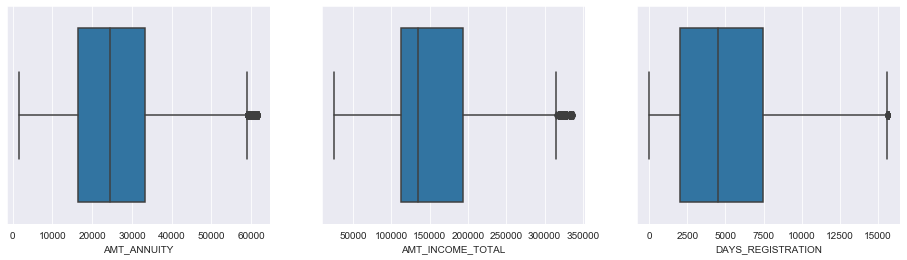

In [48]:
#visualization to see that outliers have been dropped
plt.figure(figsize=(16,4))
plt.subplot(131)
sns.boxplot(application_data_cleaned['AMT_ANNUITY'])
plt.subplot(132)
sns.boxplot(application_data_cleaned['AMT_INCOME_TOTAL'])
plt.subplot(133)
sns.boxplot(application_data_cleaned['DAYS_REGISTRATION'])
plt.show()

### Binning the age column into <30,30-60 and greater than 60 for our analysis and also based of family members count we will bin to <2,2-5,6-9,>9

In [49]:
application_data_cleaned["Age"]=pd.cut(application_data_cleaned.Age,[0,30,60,70],labels=['Teen_Age','Middle_Age','Old_Age'])
application_data_cleaned.Age.value_counts(normalize=True)*100

Middle_Age    73.277704
Teen_Age      17.172069
Old_Age        9.550227
Name: Age, dtype: float64

In [50]:
application_data_cleaned["CNT_FAM_MEMBERS"]=pd.cut(application_data_cleaned.CNT_FAM_MEMBERS,[0,2,5,9,30],labels=['Small','Medium','Large','Extra_large'])
application_data_cleaned.CNT_FAM_MEMBERS.value_counts(normalize=True)*100

Small          73.560449
Medium         26.267524
Large           0.167475
Extra_large     0.004553
Name: CNT_FAM_MEMBERS, dtype: float64

 ##  Analysis of application_data_cleaned 

### Checking the data imbalance

-------------------------
0    91.927118
1     8.072882
Name: TARGET, dtype: float64
-------------------------


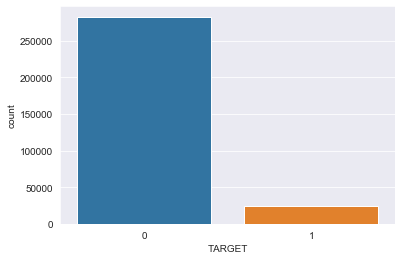

In [51]:
print("-"*25)
print(application_data_cleaned['TARGET'].value_counts(normalize=True)*100)
print("-"*25)
#visualization of data imbalance
sns.countplot(application_data_cleaned['TARGET'])
plt.show()

### Dividing the data into two sets T0 and T1 based on TARGET column

In [52]:
#creating data subset for non defaulted
T0 = application_data_cleaned[application_data_cleaned.TARGET==0]
#Creating data subset for defaulted
T1 = application_data_cleaned[application_data_cleaned.TARGET==1]

### Uni-variate analysis and Bi-variate analysis  for T1

#### Uni-variate analysis 

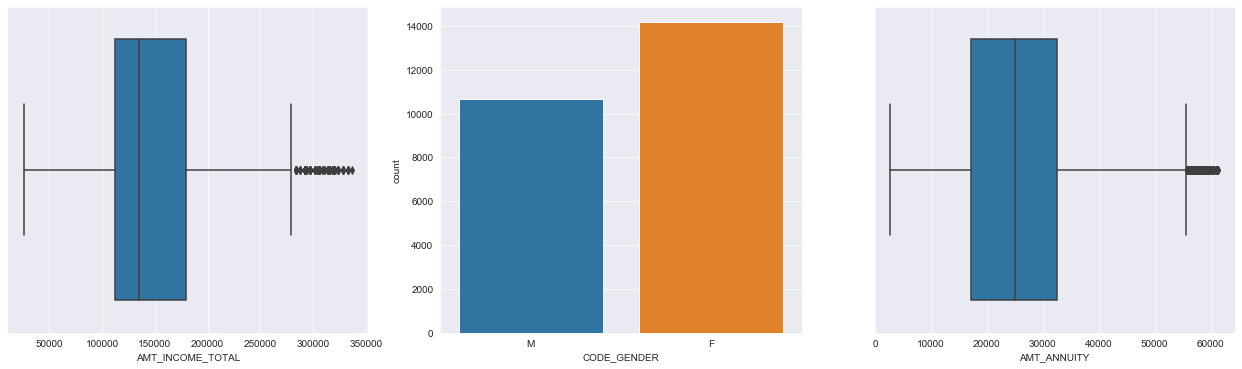

In [53]:
plt.figure(figsize=(22,6))
#Lets select the AMT_INCOME_TOTAL for analysis
plt.subplot(131)
sns.boxplot(T1['AMT_INCOME_TOTAL'])
#Lets select the Age for analysis
plt.subplot(132)
sns.countplot(T1['CODE_GENDER'])
##Lets select the FLAG_OWN_CAR for analysis
plt.subplot(133)
sns.boxplot(T1['AMT_ANNUITY'])
plt.show()

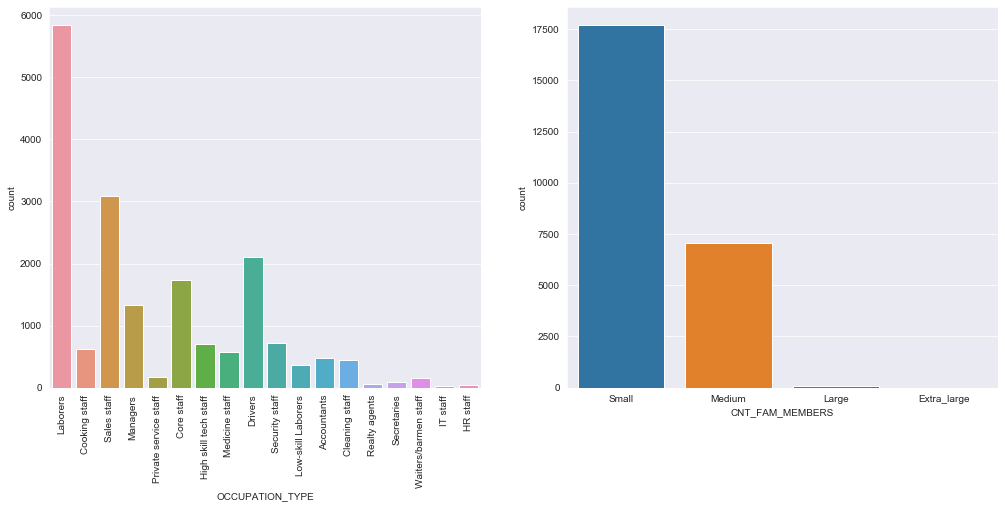

In [54]:
plt.figure(figsize=(17,7))
#Lets select the OCCUPATION_TYPE for analysis
plt.subplot(121)
sns.countplot(T1['OCCUPATION_TYPE'])
plt.xticks(rotation=90)
#Lets select the CNT_FAM_MEMBERS for analysis
plt.subplot(122)
sns.countplot(T1['CNT_FAM_MEMBERS'])
plt.show()

#### Bi-variate analysis

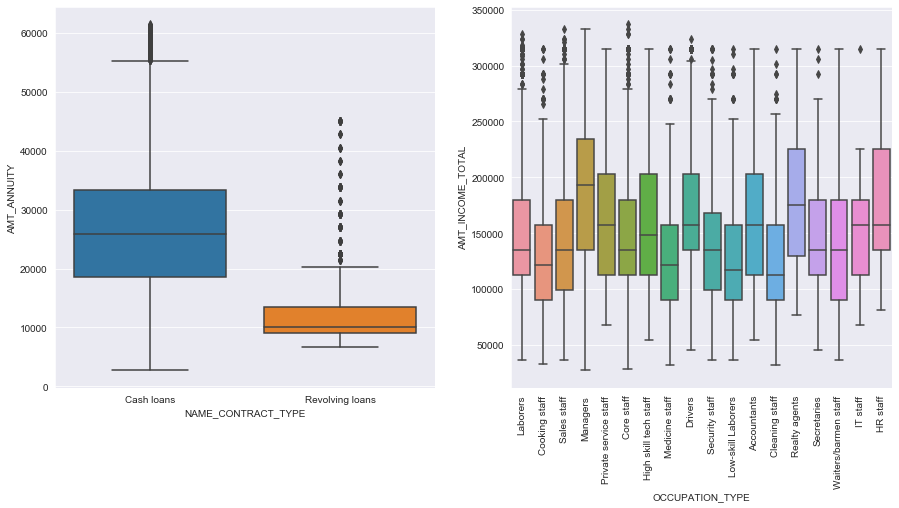

In [55]:
plt.figure(figsize=(15,7))
#lets select the column OCCUPATION_TYPE and AMT_ANNUITY
plt.subplot(121)
sns.boxplot('NAME_CONTRACT_TYPE','AMT_ANNUITY',data=T1)
#lets select the column AMT_INCOME_TOTAL and OCCUPATION_TYPE
plt.subplot(122)
plt.xticks(rotation=90)
sns.boxplot('OCCUPATION_TYPE','AMT_INCOME_TOTAL',data=T1)
plt.show()

### Uni-variate analysis and Bi-variate analysis  for T0

#### Uni-variate analysis 

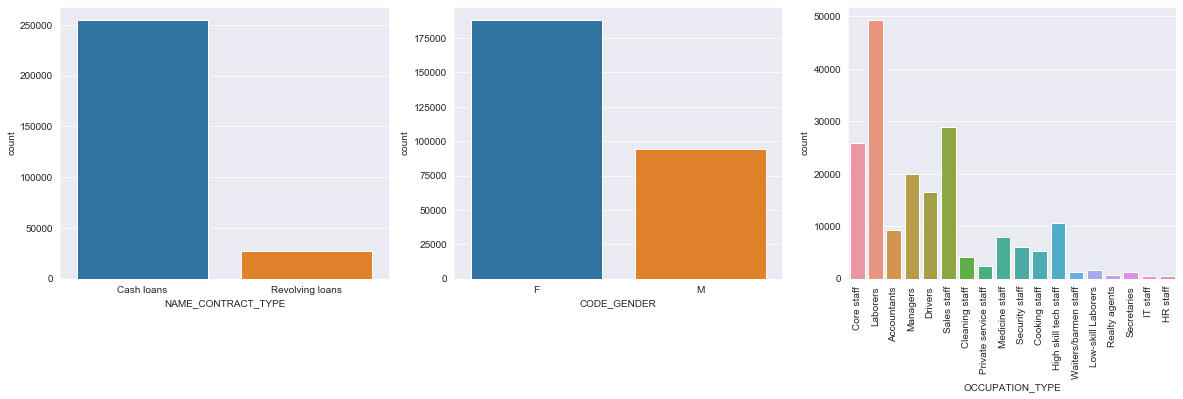

In [56]:
plt.figure(figsize=(20,5))
#Lets select the NAME_CONTRACT_TYPE for analysis
plt.subplot(131)
sns.countplot(T0['NAME_CONTRACT_TYPE'])
#Lets select the CODE_GENDER for analysis
plt.subplot(132)
sns.countplot(T0['CODE_GENDER'].replace('XNA',np.NaN))
##Lets select the FLAG_OWN_CAR for analysis
plt.subplot(133)
sns.countplot(T0['OCCUPATION_TYPE'])
plt.xticks(rotation=90)
plt.show()


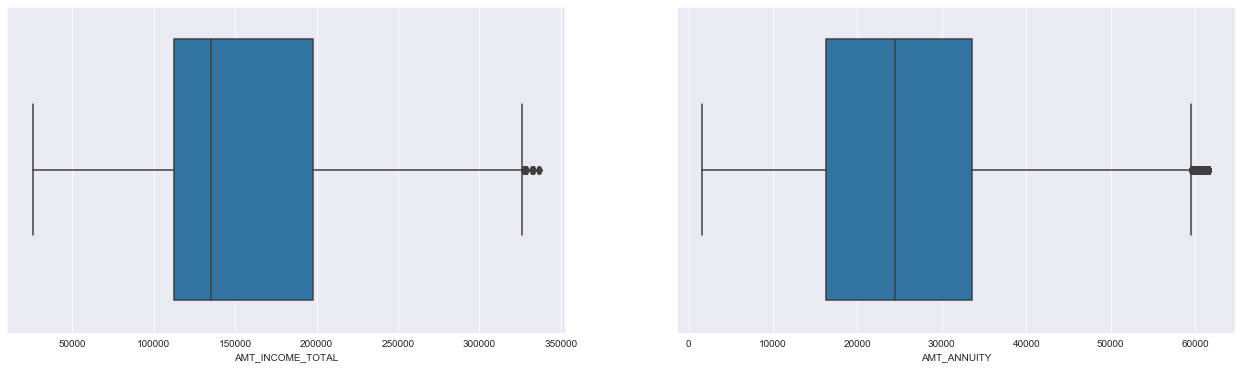

In [57]:
plt.figure(figsize=(22,6))
#Lets select the AMT_INCOME_TOTAL for analysis
plt.subplot(121)
sns.boxplot(T0['AMT_INCOME_TOTAL'])
#Lets select the AMT_ANNUITY for analysis
plt.subplot(122)
sns.boxplot(T0['AMT_ANNUITY'])
plt.show()

#### Bi-variate analysis 

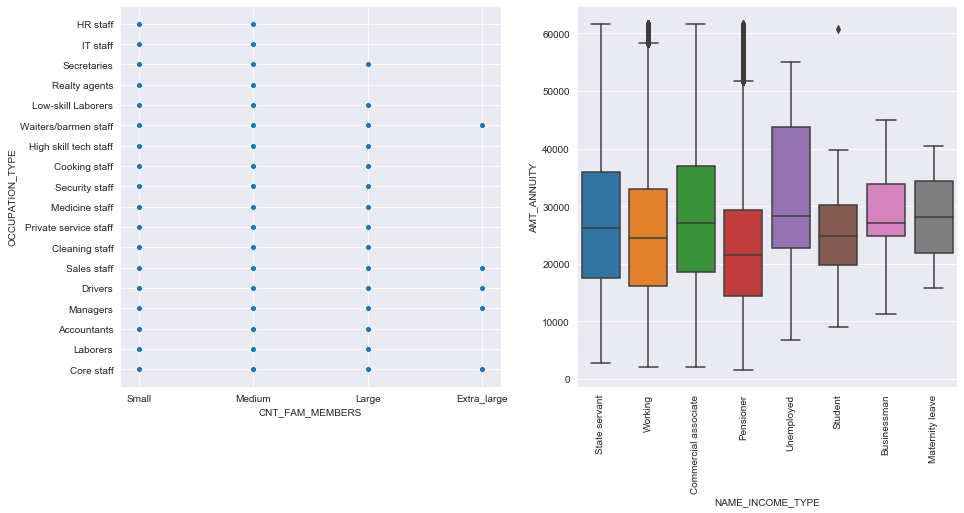

In [58]:
plt.figure(figsize=(15,7))
#lets select the column OCCUPATION_TYPE and CNT_FAM_MEMBERS
plt.subplot(121)
sns.scatterplot('CNT_FAM_MEMBERS','OCCUPATION_TYPE',data=T0)
#lets select the column AMT_INCOME_TOTAL and OCCUPATION_TYPE
plt.subplot(122)
plt.xticks(rotation=90)
sns.boxplot('NAME_INCOME_TYPE','AMT_ANNUITY',data=T0)
plt.show()

In [59]:
corr0 = T0.corr()
corr_T0 = corr0.where(np.triu(np.ones(corr0.shape), k=1).astype(np.bool)).unstack().reset_index()
corr_T0.columns = ['VAR1', 'VAR2', 'Correlation']
corr_T0.dropna(subset=['Correlation'], inplace=True)
corr_T0 = corr_T0.sort_values('Correlation', ascending=False)
corr_T0_top10 = corr_T0[corr_T0.Correlation<1].head(10)
corr_T0_top10

,VAR1,VAR2,Correlation
124,AMT_GOODS_PRICE,AMT_CREDIT,0.987250
104,AMT_ANNUITY,AMT_CREDIT,0.785304
125,AMT_GOODS_PRICE,AMT_ANNUITY,0.782737
103,AMT_ANNUITY,AMT_INCOME_TOTAL,0.428560
123,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.377610
83,AMT_CREDIT,AMT_INCOME_TOTAL,0.375434
367,AMT_REQ_CREDIT_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,0.229065
167,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,0.229065
388,AMT_REQ_CREDIT_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,0.229065
398,AMT_REQ_CREDIT_HOUR,AMT_REQ_CREDIT_DAY,0.229065


In [60]:
corr1 = T1.corr()
corr_T1 = corr1.where(np.triu(np.ones(corr1.shape), k=1).astype(np.bool)).unstack().reset_index()
corr_T1.columns = ['VAR1', 'VAR2', 'Correlation']
corr_T1.dropna(subset=['Correlation'], inplace=True)
corr_T1 = corr_T1.sort_values('Correlation', ascending=False)
corr_T1_top10 =corr_T1[corr_T1.Correlation<1].head(10)
corr_T1_top10

,VAR1,VAR2,Correlation
124,AMT_GOODS_PRICE,AMT_CREDIT,0.983103
104,AMT_ANNUITY,AMT_CREDIT,0.753897
125,AMT_GOODS_PRICE,AMT_ANNUITY,0.749855
103,AMT_ANNUITY,AMT_INCOME_TOTAL,0.396965
83,AMT_CREDIT,AMT_INCOME_TOTAL,0.328466
123,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,0.326969
367,AMT_REQ_CREDIT_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,0.246741
398,AMT_REQ_CREDIT_HOUR,AMT_REQ_CREDIT_DAY,0.246741
167,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,0.246741
388,AMT_REQ_CREDIT_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,0.246741


In [61]:
# by this we can see that top 10 are same for both by using var 1 of correlation for corr_T1_top10 and corr_T0_top10
np.array(corr_T1_top10.VAR1.sort_values(ascending=True).to_list())==np.array(corr_T0_top10.VAR1.sort_values(ascending=True).to_list())

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

### From above we can say that correlation variables for T0 and T1 are the same by seeing corr_T0_top10  and corr_T1_top10

## Merging previous_application_data with application_data_cleaned into final dataset named final_data

In [62]:
final_data=application_data_cleaned.merge(prev_data.drop_duplicates(),'left',on='SK_ID_CURR')
final_data.CODE_GENDER.replace('XNA',np.NaN,inplace=True)

In [63]:
final_data.shape

(1430155, 68)

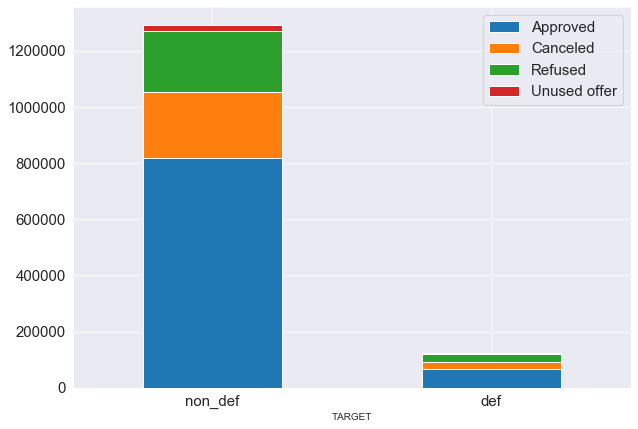

In [64]:
final_data.groupby('TARGET')['NAME_CONTRACT_STATUS'].value_counts().unstack().plot(kind="bar",figsize=(10,7),stacked=True)
plt.legend(fontsize=15)
plt.xticks([0,1],['non_def','def'],rotation=360,fontsize=15)
plt.yticks(fontsize=15)
plt.show()

### From the above barplot we can see that out of non defaulters people canceled their loan   which is not a good sign for business because canceled has a significant bar as shown in above 
### As well as in defaulters  the canceled  is not that significant 

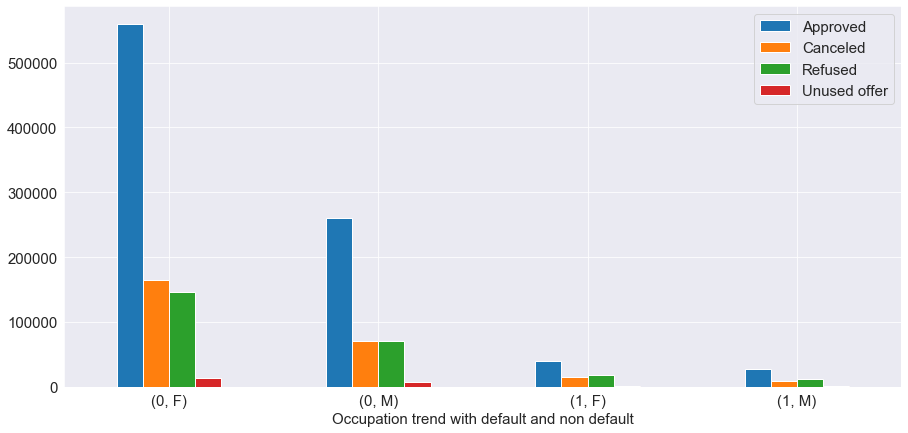

In [65]:
final_data.groupby(['TARGET','CODE_GENDER'])['NAME_CONTRACT_STATUS'].value_counts().unstack().plot(kind="bar",figsize=(15,7))
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.xlabel('Occupation trend with default and non default',fontsize=15)
plt.legend(fontsize=15)
plt.show()

## We can clearly see that female population has high chances of getting loans approved and the graph shows that cancelation of loan by females is significant across defaulters and non defaulters 

In [66]:
# So lets see data gender wise for better analysis

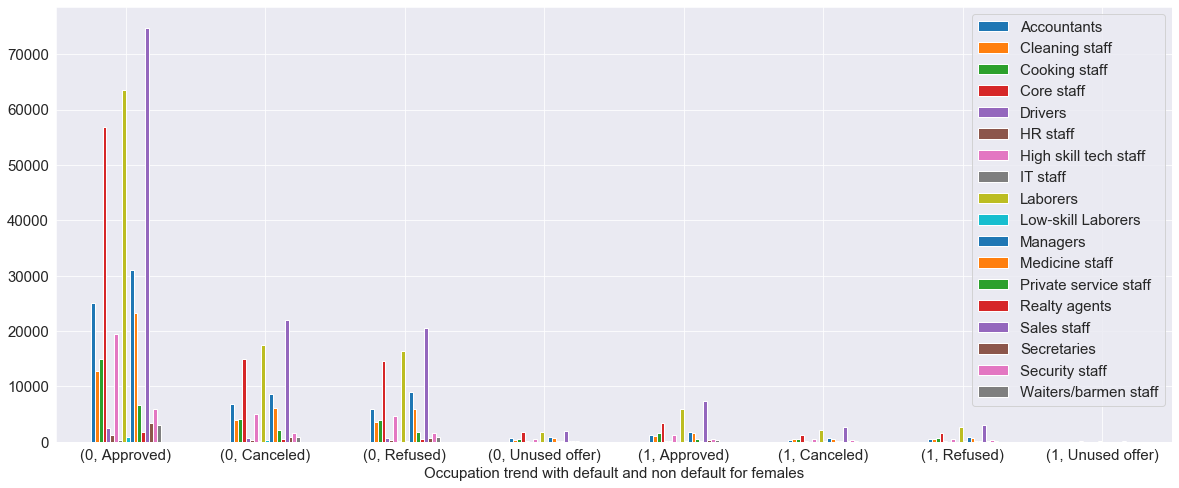

In [67]:
final_data[final_data.CODE_GENDER=='F'].groupby(['TARGET','NAME_CONTRACT_STATUS'])['OCCUPATION_TYPE'].value_counts().unstack().plot(kind="bar",figsize=(20,8))
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.xlabel('Occupation trend with default and non default for females',fontsize=15)
plt.legend(fontsize=15)
plt.show()

### As we can see from the above for Female gender data most of the people who apply for loan are into Sales Staff

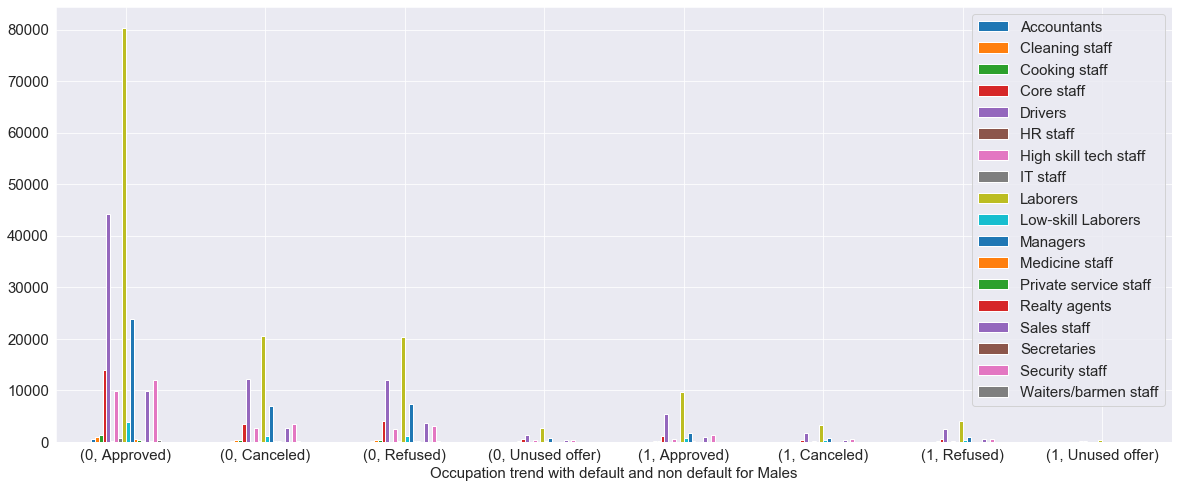

In [68]:
final_data[final_data.CODE_GENDER=='M'].groupby(['TARGET','NAME_CONTRACT_STATUS'])['OCCUPATION_TYPE'].value_counts().unstack().plot(kind="bar",figsize=(20,8))
plt.xticks(fontsize=15,rotation=0)
plt.yticks(fontsize=15)
plt.xlabel('Occupation trend with default and non default for Males',fontsize=15)
plt.legend(fontsize=15)
plt.show()

### As we can see from the above for Male gender data most of the people who apply for loan are into Laborers

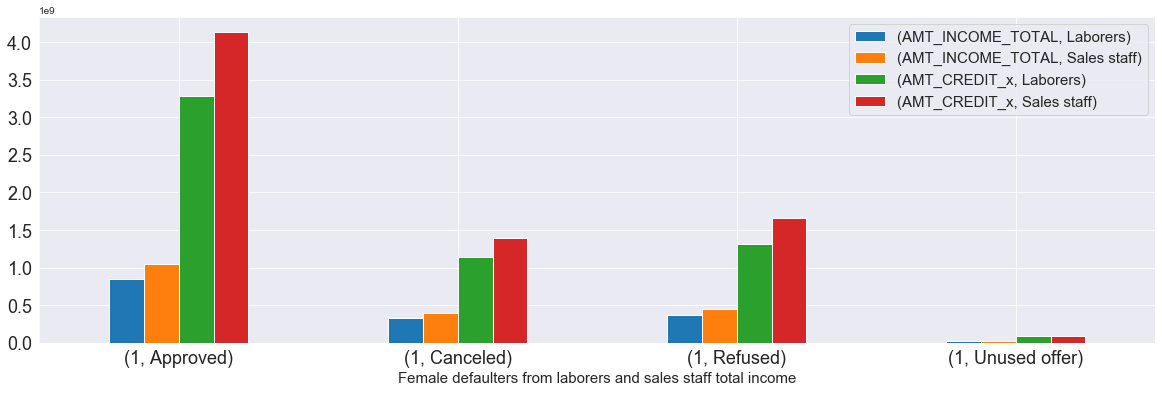

In [69]:
male_def=final_data[(final_data.CODE_GENDER=='M') & (final_data.TARGET==1) & ((final_data.OCCUPATION_TYPE=='Laborers')|(final_data.OCCUPATION_TYPE=='Drivers'))]
female_def=final_data[(final_data.CODE_GENDER=='F') & (final_data.TARGET==1) & ((final_data.OCCUPATION_TYPE=='Laborers')|(final_data.OCCUPATION_TYPE=='Sales staff'))]
female_def.groupby(['TARGET','NAME_CONTRACT_STATUS','OCCUPATION_TYPE'])['AMT_INCOME_TOTAL','AMT_CREDIT_x'].sum().unstack().plot(kind='bar',figsize=(20,6))
plt.xticks(rotation=0,fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Female defaulters from laborers and sales staff total income',fontsize=15)
plt.legend(fontsize=15)
plt.show()

## From Female gender most of the people work in  Sales staff  and Laborers  who are being defaulted  as you can see over all income and over all credit difference so we should limit down the credit approval especially for women from Sales staff so that business won't be affected

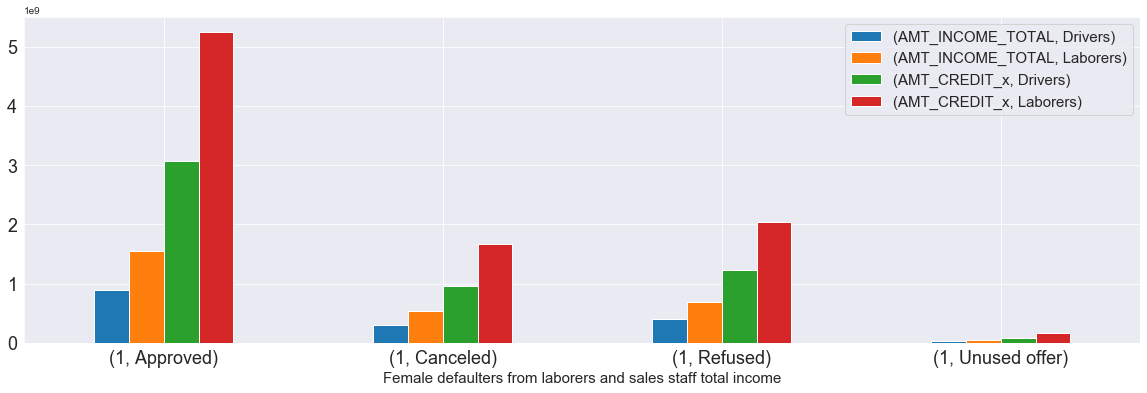

In [70]:
male_def.groupby(['TARGET','NAME_CONTRACT_STATUS','OCCUPATION_TYPE'])['AMT_INCOME_TOTAL','AMT_CREDIT_x'].sum().unstack().plot(kind='bar',figsize=(20,6))
plt.xticks(rotation=0,fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel('Female defaulters from laborers and sales staff total income',fontsize=15)
plt.legend(fontsize=15)
plt.show()


## From Male gender most of the people work in  Laborers and Drivers who are being defaulted  as you can see over all income and over all credit difference so we should limit down the credit approval especially for men from Laborers so that business won't be affected

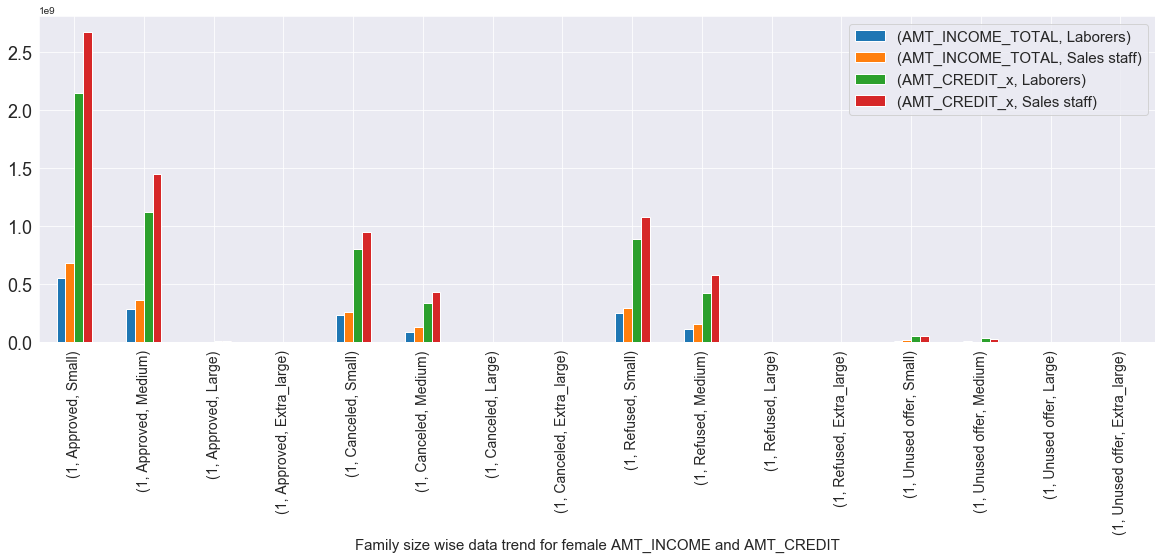

In [71]:
female_def.groupby(['TARGET','NAME_CONTRACT_STATUS','CNT_FAM_MEMBERS','OCCUPATION_TYPE'])['AMT_INCOME_TOTAL','AMT_CREDIT_x'].sum().unstack().plot(kind='bar',figsize=(20,6))
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Family size wise data trend for female AMT_INCOME and AMT_CREDIT',fontsize=15)
plt.yticks(fontsize=18)
plt.legend(fontsize=15)
plt.show()

### If Family size is Small then there is a very high possibility that they are going to be defaulted especially for sales staff and laborers for female

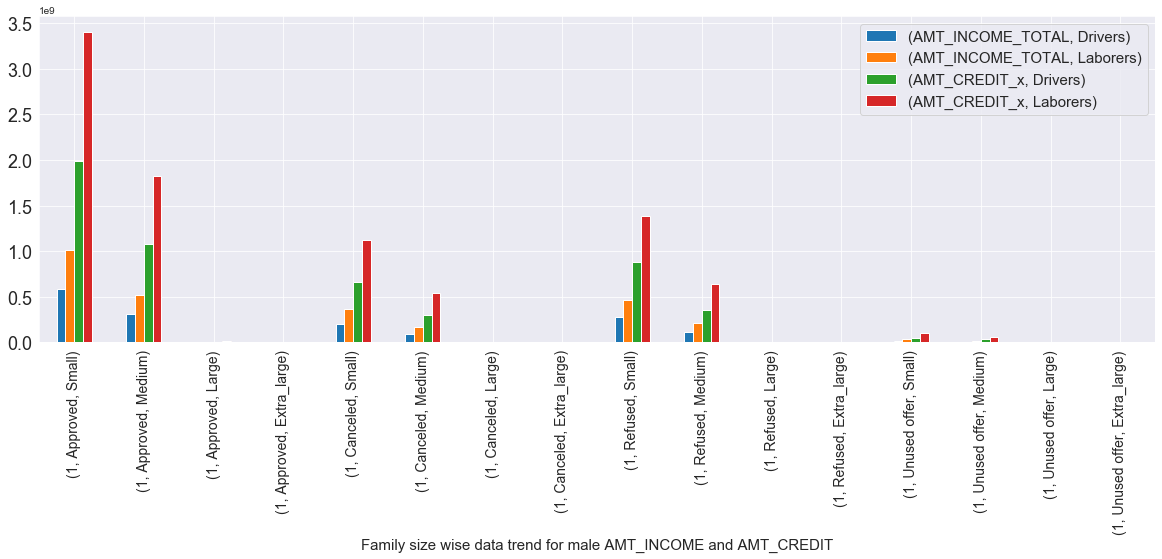

In [72]:
male_def.groupby(['TARGET','NAME_CONTRACT_STATUS','CNT_FAM_MEMBERS','OCCUPATION_TYPE'])['AMT_INCOME_TOTAL','AMT_CREDIT_x'].sum().unstack().plot(kind='bar',figsize=(20,6))
plt.xticks(rotation=90,fontsize=14)
plt.xlabel('Family size wise data trend for male AMT_INCOME and AMT_CREDIT',fontsize=15)
plt.yticks(fontsize=18)
plt.legend(fontsize=15)
plt.show()

### If Family size is Small then there is a very high possibility that they are going to be defaulted especially for drivers and laborers for male